In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [181]:
data = pd.read_csv('data/wine.csv')

In [182]:
data['taster_name'].nunique()

19

In [183]:
data['price'].max()

3300.0

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [185]:
mask = data.duplicated(subset=data.columns) # маска для фильтрации
data_duplicates = data[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 9983


<AxesSubplot: >

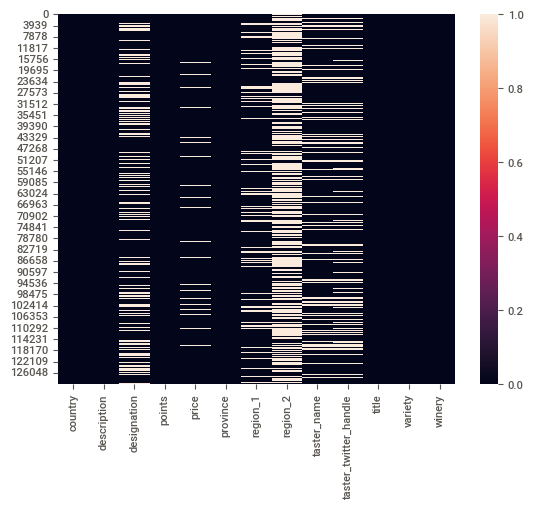

In [186]:
sns.heatmap(data.isnull())

In [187]:
data = data.drop(['region_2'], axis=1)

<AxesSubplot: >

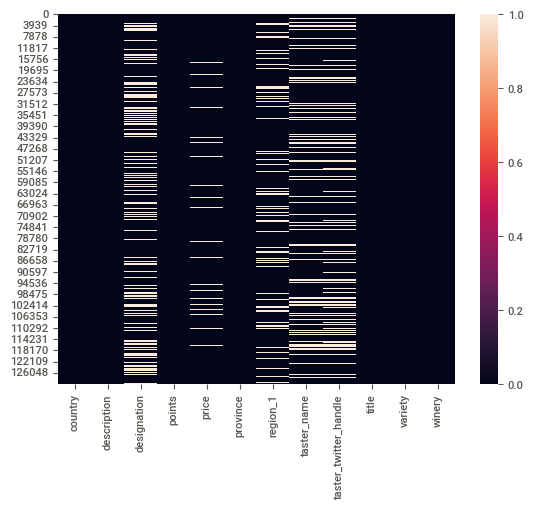

In [188]:
sns.heatmap(data.isnull())

In [189]:
data.describe(include='all')

country                                        description designation  \
count   129908                                             129971       92506   
unique      43                                             119955       37979   
top         US  Seductively tart in lemon pith, cranberry and ...     Reserve   
freq     54504                                                  3        2009   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1 taster_name  \
count   129971.000000  120975.000000      129908       108724      103727   
unique            NaN            NaN         425         1229          19   
top               NaN            NaN  California  Napa Valley  Roger Voss   
freq              NaN            NaN       36247         4480       25514   
mean        88.447138      35.363389         NaN          NaN         NaN   
std          3.039730      41.022218         NaN          NaN         NaN   
min         80.000000       4.000000         NaN          NaN         NaN   
25%         86.000000      17.000000         NaN          NaN         NaN   
50%         88.000000      25.000000         NaN          NaN         NaN   
75%         91.000000      42.000000         NaN          NaN         NaN   
max        100.000000    3300.000000         NaN          NaN         NaN   

       taster_twitter_handle  \
count                  98758   
unique                    15   
top               @vossroger   
freq                   25514   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                                    title     variety  \
count                                              129971      129970   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                   11       13272   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               129971  
unique               16757  
top     Wines & Winemakers  
freq                   222  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [190]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')

<AxesSubplot: >

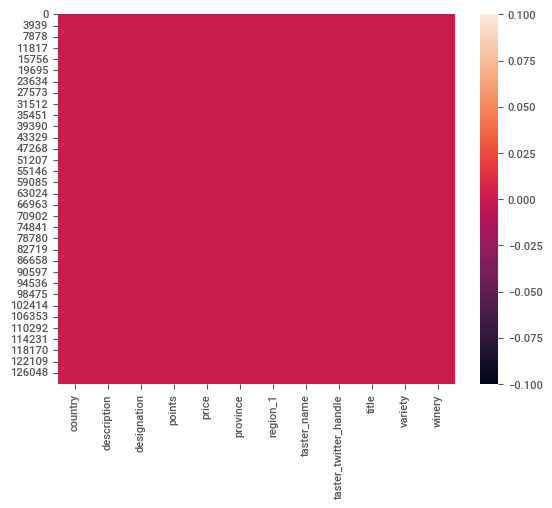

In [191]:
sns.heatmap(data.isnull())

In [192]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('data/wine.csv')

In [193]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [89]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv('data/wine.csv')

In [90]:
report = sv.analyze(df)
report.show_html()

c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecat

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [194]:
import pandas as pd
import dtale

df = pd.read_csv('data/wine.csv')

In [195]:
d = dtale.show(df)
d

c:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\views.py:755: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [297]:
import statistics
import pandas as pd

In [368]:
wc = pd.read_csv('data/wine_cleared.csv')

In [198]:
wc.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [96]:
wc['points'].min()

80

In [97]:
wc['price'].min()

4.0

In [98]:
statistics.mean(wc['price'])

35.363389129985535

In [99]:
wc['price'].sum()/wc['price'].count()

35.363389129985535

In [100]:
statistics.median(wc['price'])

28.0

In [101]:
wc['price'].median()

28.0

In [102]:
statistics.mode(wc['price'])

35.363389129985535

In [103]:
wc.corr()

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\684897852.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

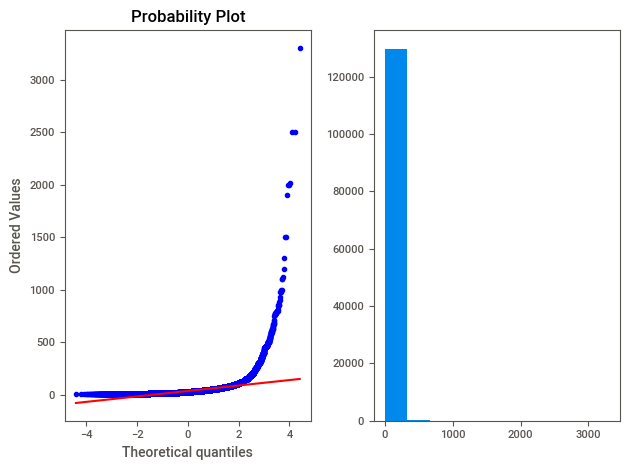

In [104]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wc['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wc['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

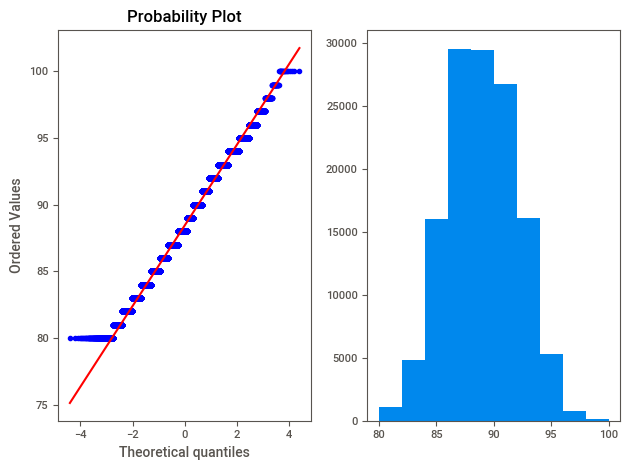

In [105]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wc['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wc['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [106]:
wc.corr(method='spearman')

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\3201498487.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Unnamed: 0    points     price
Unnamed: 0    1.000000  0.009378  0.003751
points        0.009378  1.000000  0.581095
price         0.003751  0.581095  1.000000

In [107]:
round(wc.corr(method='kendall'), 2)

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\3850365571.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Unnamed: 0  points  price
Unnamed: 0        1.00    0.01   0.00
points            0.01    1.00   0.43
price             0.00    0.43   1.00

In [108]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [109]:
data = pd.read_csv('data/model.csv')

In [110]:
data.head()

Month  Year      Waist       Hips     Height      Weight        BMI  \
0  December  1953  24.000000  36.000000  65.000000  118.000000  19.630000   
1   January  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
2  February  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
3     March  1954  24.000000  35.000000  66.000000  118.000000  19.040000   
4     April  1954  23.433172  34.698708  66.057258  114.936066  18.232168   

   Waist/Hip  
0   0.670000  
1   0.677916  
2   0.677916  
3   0.690000  
4   0.677916

In [111]:
data.corr()

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

In [112]:
import seaborn as sns

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\1794321463.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

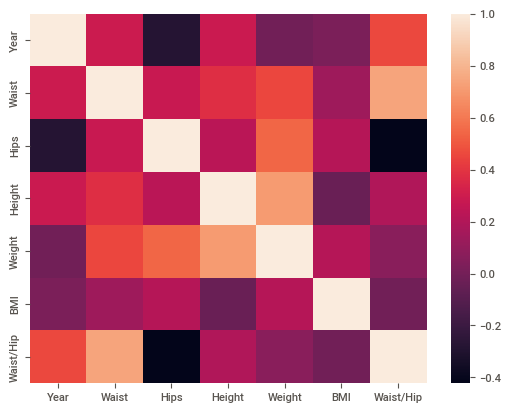

In [113]:
sns.heatmap(data.corr())

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\1679999493.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

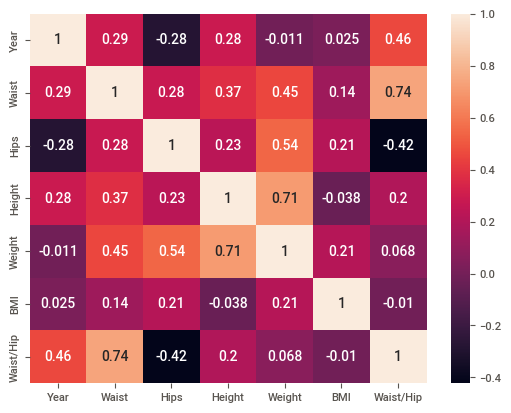

In [114]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot: xlabel='Waist/Hip', ylabel='Waist'>

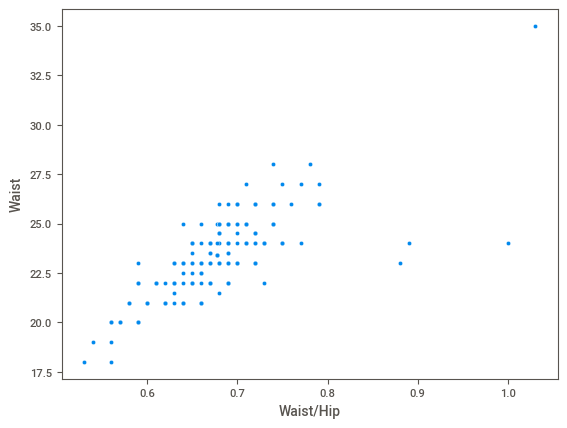

In [115]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<AxesSubplot: xlabel='Weight', ylabel='Year'>

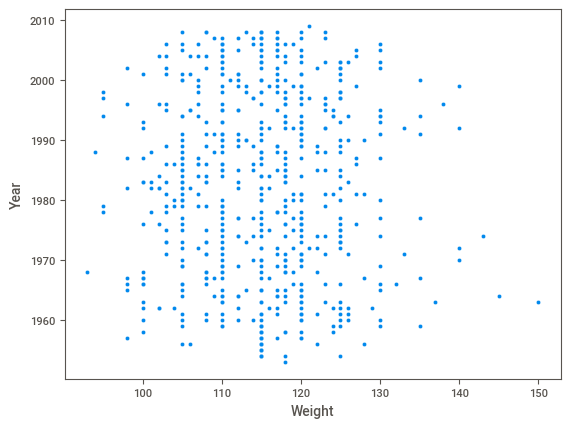

In [116]:
sns.scatterplot(data=data, x="Weight", y="Year")

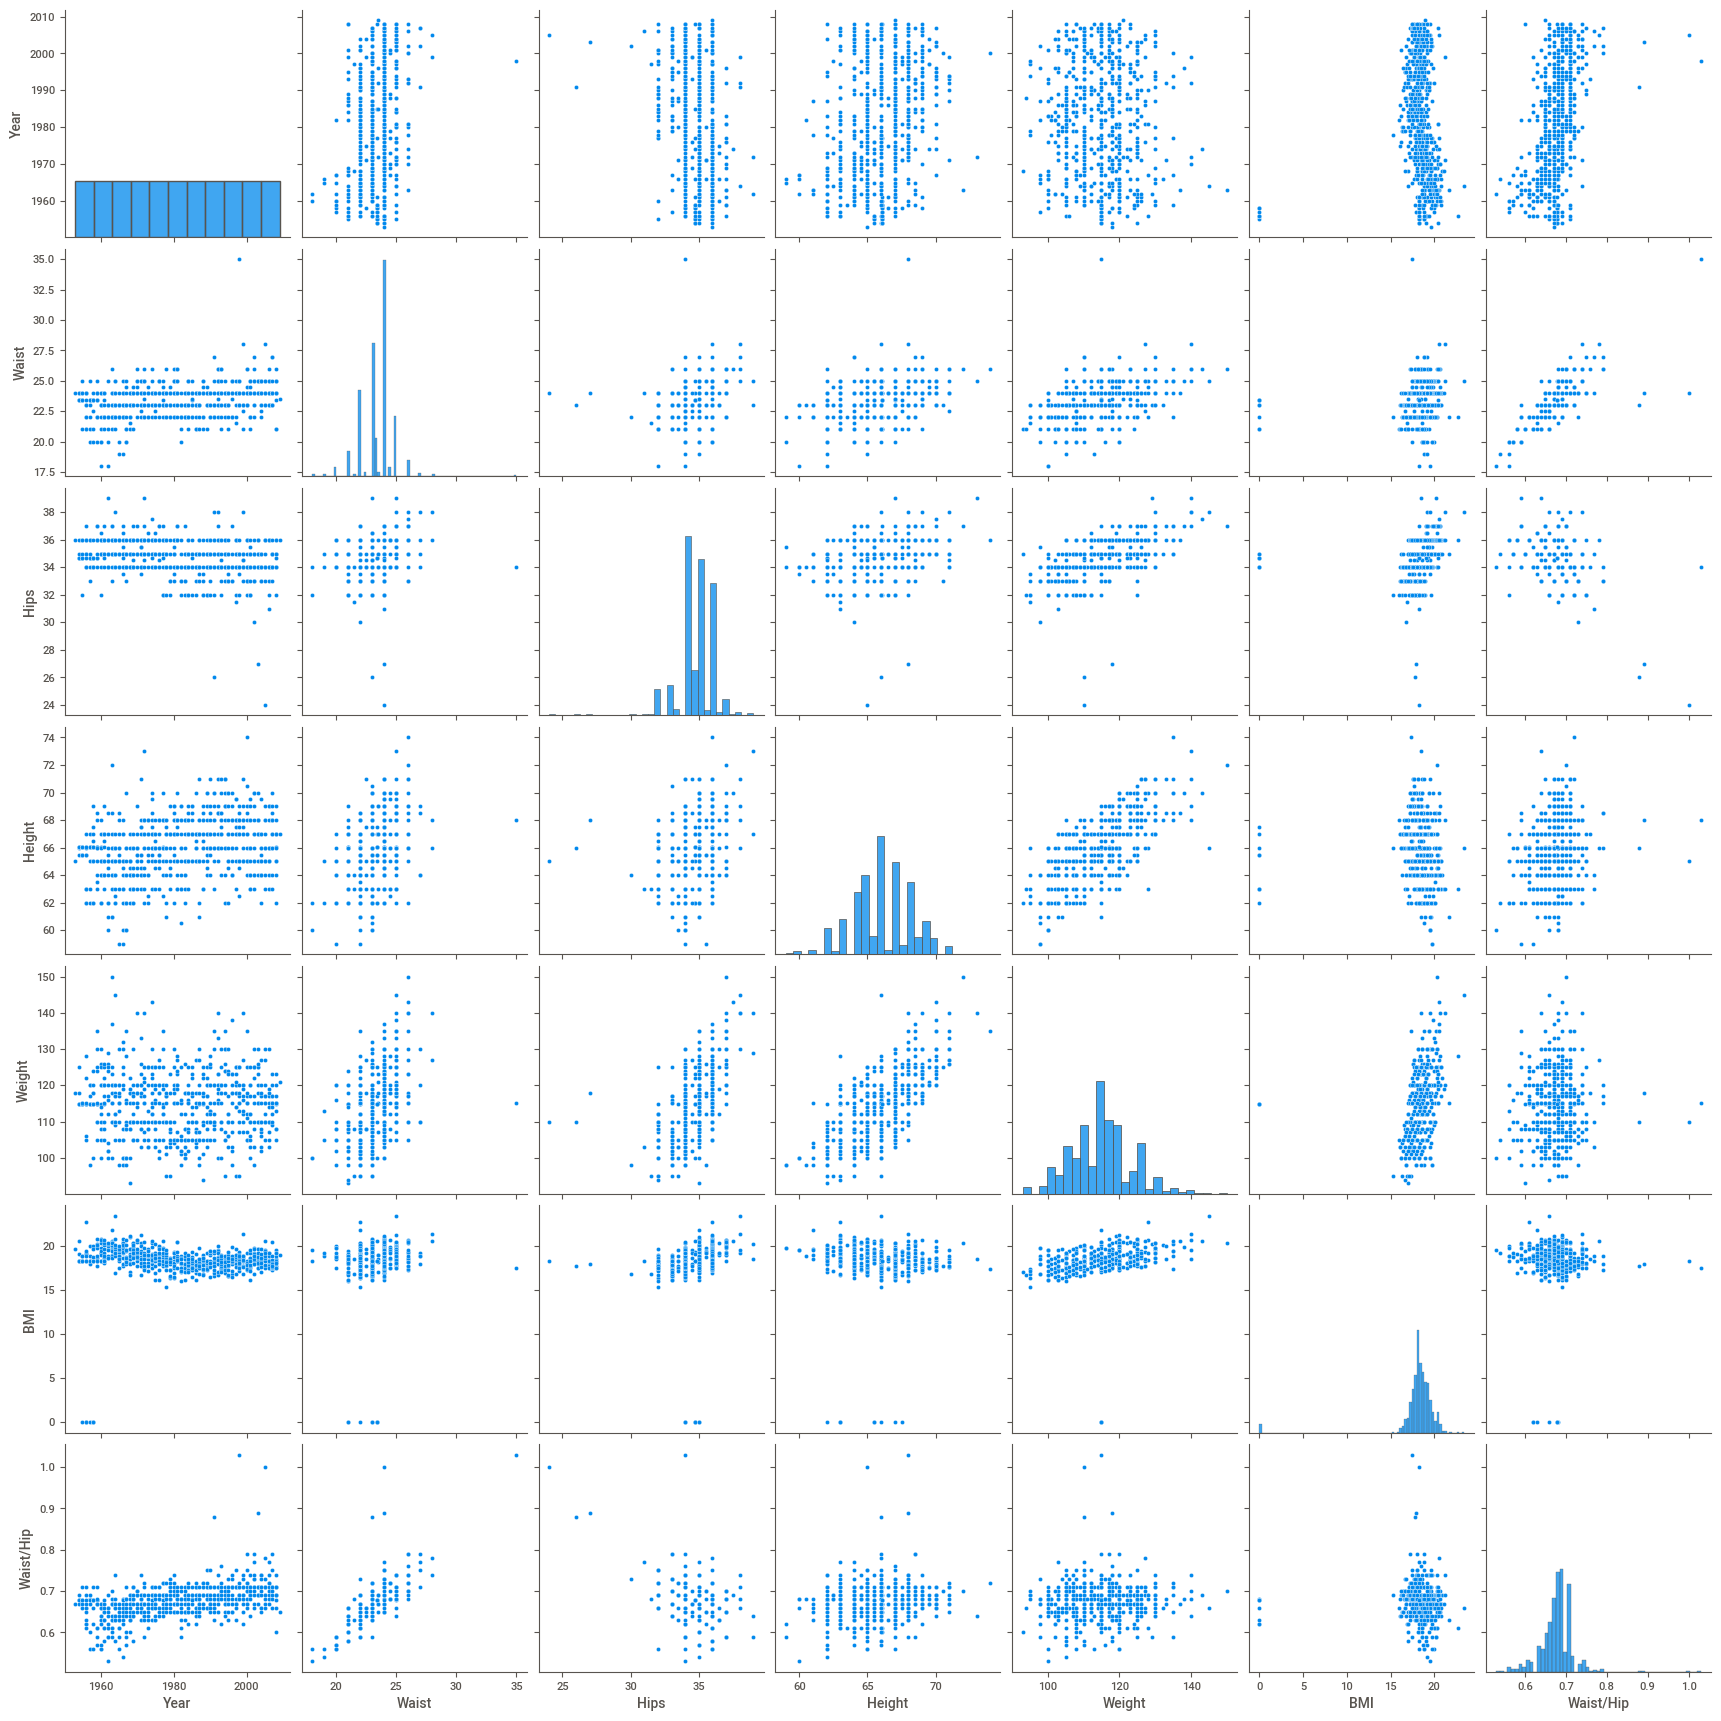

In [117]:
sns.pairplot(data)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [119]:
statistics.mean(data['Weight'])

114.93606557377049

In [120]:
statistics.mean(data['Height'])

66.05725806451613

<AxesSubplot: xlabel='Hips', ylabel='BMI'>

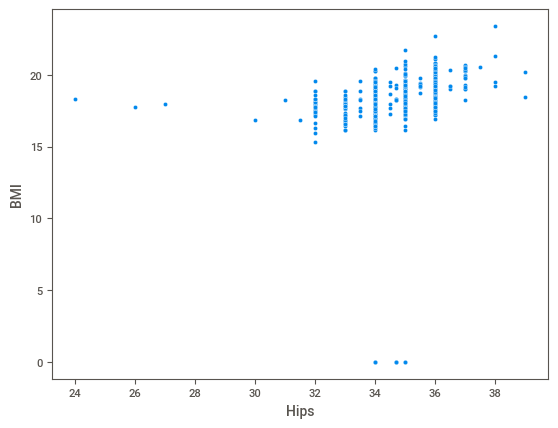

In [121]:
sns.scatterplot(data=data, x="Hips", y="BMI")

In [369]:
# для удобства сразу преобразуем признак в int
wc['price_round'] = wc['price'].round().astype(int)

In [370]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wc['year'] = wc['title'].str.findall(regex).str.get(0)

In [201]:
wc.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round  year  
0              Nicosia           35  2013  
1  Quinta dos Avidagos           15  2011  
2            Rainstorm           14  2013  
3           St. Julian           13  2013  
4         Sweet Cheeks           65  2012

In [371]:
wc['is_usa'] = wc['country'].apply(lambda x: 1 if x == 'US' else 0)

In [203]:
wc['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [372]:
wc['is_france'] = wc['country'].apply(lambda x: 1 if x == 'France' else 0)

In [374]:
wc['is_italy'] = wc['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [129]:
wc['is_france'].sum()

22093

In [130]:
wc['is_italy'].sum()

19540

In [270]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [375]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [376]:
wc['old_wine'] = wc['year'].apply(lambda x: 1 if float(x) < 2010 else 0)

In [275]:
wc['old_wine'].sum()

39781

In [377]:
regex = '\((.*?)\)'
wc['locality'] = wc['title'].str.findall(regex).str.get(0)

In [210]:
wc.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  price_round    year  is_usa  is_france  is_italy  \
0              Nicosia           35  2013.0       0          0         1   
1  Quinta dos Avidagos           15  2011.0       0          0         0   
2            Rainstorm           14  2013.0       1          0         0   
3           St. Julian           13  2013.0       1          0         0   
4         Sweet Cheeks           65  2012.0       1          0         0   

   old_wine             locality  
0         0                 Etna  
1         0                Douro  
2         0    Willamette Valley  
3         0  Lake Michigan Shore  
4         0    Willamette Valley

In [378]:
import pandas as pd
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

country     population
0               China  1,411,778,724
1               India  1,386,584,581
2                  US    333,022,386
3           Indonesia    271,350,000
4            Pakistan    225,200,000
..                ...            ...
236              Niue          1,549
237           Tokelau          1,501
238      Vatican City            825
239     Cocos Islands            573
240  Pitcairn Islands             40

[241 rows x 2 columns]

In [278]:
country_population[country_population['country'] == 'Italy']

country  population
24   Italy  59,097,904

In [379]:
wc = wc.join(country_population.set_index('country'), on='country')

In [213]:
wc

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...         variety  \
0               @kerinokeefe  ...     White Blend   
1                 @vossroger  ...  Portuguese Red   
2                @paulgwine   ...      Pinot Gris   
3                    unknown  ...        Riesling   
4                @paulgwine   ...      Pinot Noir   
...                      ...  ...             ...   
129966               unknown  ...        Riesling   
129967           @paulgwine   ...      Pinot Noir   
129968            @vossroger  ...  Gewürztraminer   
129969            @vossroger  ...      Pinot Gris   
129970            @vossroger  ...  Gewürztraminer   

                                          winery price_round    year  is_usa  \
0                                        Nicosia          35  2013.0       0   
1                            Quinta dos Avidagos          15  2011.0       0   
2                                      Rainstorm          14  2013.0       1   
3                                     St. Julian          13  2013.0       1   
4                                   Sweet Cheeks          65  2012.0       1   
...                                          ...         ...     ...     ...   
129966  Dr. H. Thanisch

In [380]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

country         area
0          Russia  17075400.00
1          Canada   9984670.00
2           China   9596960.00
3              US   9372610.00
4          Brazil   8547000.00
..            ...          ...
188    San Marino        61.00
189        Tuvalu        26.00
190         Nauru        21.00
191        Monaco         2.00
192  Vatican City         0.44

[193 rows x 2 columns]

In [160]:
country_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   area     193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [381]:
wc = wc.join(country_area.set_index('country'), on='country')

In [216]:
wc

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...                                    winery  \
0               @kerinokeefe  ...                                   Nicosia   
1                 @vossroger  ...                       Quinta dos Avidagos   
2                @paulgwine   ...                                 Rainstorm   
3                    unknown  ...                                St. Julian   
4                @paulgwine   ...                              Sweet Cheeks   
...                      ...  ...                                       ...   
129966               unknown  ...  Dr. H. Thanisch (Erben Müller-Burggraef)   
129967           @paulgwine   ...                                  Citation   
129968            @vossroger  ...                           Domaine Gresser   
129969            @vossroger  ...                      Domaine Marcel Deiss   
129970            @vossroger  ...                          Domaine Schoffit   

       price_round    year  is_usa  is_france  is_italy  old_wine  \
0               35  2013.0       0          0         1         0   
1               15  2011.0       0          0         0         0   
2               14  2013.0       1          0         0         

In [282]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129972 non-null  int64  
 1   country                129909 non-null  object 
 2   description            129972 non-null  object 
 3   designation            129972 non-null  object 
 4   points                 129972 non-null  int64  
 5   price                  129972 non-null  float64
 6   province               129909 non-null  object 
 7   region_1               129972 non-null  object 
 8   taster_name            129972 non-null  object 
 9   taster_twitter_handle  129972 non-null  object 
 10  title                  129972 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129972 non-null  object 
 13  price_round            129972 non-null  int32  
 14  year                   125363 non-nu

In [283]:
wc[wc['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

In [221]:
country_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     241 non-null    object
 1   population  241 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [223]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [224]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  
0         1  
1       231  
2       104  
3         2  
4       215  
5        95  
6        92  
7       215  
8        94  
9         6

In [225]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  
0         1                5  
1       231                2  
2       104                0  
3         2                7  
4       215                1  
5        95                5  
6        92                2  
7       215                0  
8        94                1  
9         6               66

In [226]:
calls['time_connection'].sum()

89

In [228]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client_id        10 non-null     int64         
 1   agent_date       10 non-null     datetime64[ns]
 2   created_at       10 non-null     datetime64[ns]
 3   end_date         10 non-null     datetime64[ns]
 4   duration         10 non-null     int64         
 5   time_connection  10 non-null     int64         
dtypes: datetime64[ns](3), int64(3)
memory usage: 608.0 bytes


In [230]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)

In [231]:
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  
0         1                5              0  
1       231                2              1  
2       104                0              1  
3         2                7              0  
4       215                1              1  
5        95                5              1  
6        92                2              1  
7       215                0              1  
8        94                1              1  
9         6               66              0

In [232]:
calls['is_connection'].sum()

7

In [233]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds

In [234]:
calls['time_diff'].sum()

1144

In [235]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [382]:
wc['year'] = pd.to_datetime(wc['year'], errors = 'coerce')

In [285]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [383]:
wc['years_diff'] = (pd.to_datetime("01/12/2022") - wc['year']).dt.days
wc


Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... price_round       year is_usa  is_france  \
0               @kerinokeefe  ...          35 2013-01-01      0          0   
1                 @vossroger  ...          15 2011-01-01      0          0   
2                @paulgwine   ...          14 2013-01-01      1          0   
3                    unknown  ...          13 2013-01-01      1          0   
4                @paulgwine   ...          65 2012-01-01      1          0   
...                      ...  ...         ...        ...    ...        ...   
129966               unknown  ...          28 2013-01-01      0          0   
129967           @paulgwine   ...          75 2004-01-01      1          0   
129968            @vossroger  ...          30 2013-01-01      0          1   
129969            @vossroger  ...          32 2012-01-01      0          1   
129970            @vossroger  ...          21 2012-01-01      0          1   

       is_italy  old_wine                locality   population       area  \
0             1         0                    Etna   59,097,904   301230.0   
1             0         0                   Douro   10,347,892    92391.0   
2             0         0       Willamette Valley  3

In [313]:
wc['years_diff'].max()

98627.0

In [314]:
import category_encoders as ce

In [320]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [321]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

size   type  size
0   xxs  dress     1
1   xxs  skirt     1
2    xs  dress     2
3     s  skirt     3
4     m  dress     4
5     l  shirt     5
6     s   coat     3
7     m   coat     4
8   xxl  shirt     6
9     l  dress     5

In [384]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder(cols=['year'])
data_bin = ord_encoder.fit_transform(wc['year'])
wc = pd.concat([wc, data_bin], axis=1)

wc

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ...       year is_usa is_france  is_italy  \
0               @kerinokeefe  ... 2013-01-01      0         0         1   
1                 @vossroger  ... 2011-01-01      0         0         0   
2                @paulgwine   ... 2013-01-01      1         0         0   
3                    unknown  ... 2013-01-01      1         0         0   
4                @paulgwine   ... 2012-01-01      1         0         0   
...                      ...  ...        ...    ...       ...       ...   
129966               unknown  ... 2013-01-01      0         0         0   
129967           @paulgwine   ... 2004-01-01      1         0         0   
129968            @vossroger  ... 2013-01-01      0         1         0   
129969            @vossroger  ... 2012-01-01      0         1         0   
129970            @vossroger  ... 2012-01-01      0         1         0   

       old_wine                locality   population       area  years_diff  \
0             0                    Etna   59,097,904   301230.0      3298.0   
1             0                   Douro   10,347,892    92391.0      4029.0   
2             0       Willamette Valley  333,022,386  9372610.0      3298.0   
3  

In [385]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(wc['taster_name'])
wc = pd.concat([wc, type_bin], axis=1)

wc

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... taster_name_Jim Gordon  \
0               @kerinokeefe  ...                      0   
1                 @vossroger  ...                      0   
2                @paulgwine   ...                      0   
3                    unknown  ...                      0   
4                @paulgwine   ...                      0   
...                      ...  ...                    ...   
129966               unknown  ...                      0   
129967           @paulgwine   ...                      0   
129968            @vossroger  ...                      0   
129969            @vossroger  ...                      0   
129970            @vossroger  ...                      0   

       taster_name_Joe Czerwinski taster_name_Anne Krebiehl MW  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
129966                          0    

In [319]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129972 non-null  int64         
 1   country                         129909 non-null  object        
 2   description                     129972 non-null  object        
 3   designation                     129972 non-null  object        
 4   points                          129972 non-null  int64         
 5   price                           129972 non-null  float64       
 6   province                        129909 non-null  object        
 7   region_1                        129972 non-null  object        
 8   taster_name                     129972 non-null  object        
 9   taster_twitter_handle           129972 non-null  object        
 10  title                           129972 non-null  object 

In [322]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  size  type_0  type_1  type_2
0   xxs  dress     1       0       0       1
1   xxs  skirt     1       0       1       0
2    xs  dress     2       0       0       1
3     s  skirt     3       0       1       0
4     m  dress     4       0       0       1
5     l  shirt     5       0       1       1
6     s   coat     3       1       0       0
7     m   coat     4       1       0       0
8   xxl  shirt     6       0       1       1
9     l  dress     5       0       0       1

In [323]:
wine = pd.read_csv('data/wine_cleared.csv')

In [324]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(wine['country'])
wine = pd.concat([wine, type_bin], axis=1)

wine

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pi

In [325]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  country_0              129971 non-null  int64  
 14  country_1              129971 non-nu

In [327]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(wine['taster_twitter_handle'])
wine = pd.concat([wine, type_bin], axis=1)

wine

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... country_1 country_2 country_3  country_4  \
0               @kerinokeefe  ...         0         0         0          0   
1                 @vossroger  ...         0         0         0          1   
2                @paulgwine   ...         0         0         0          1   
3                    unknown  ...         0         0         0          1   
4                @paulgwine   ...         0         0         0          1   
...                      ...  ...       ...       ...       ...        ...   
129966               unknown  ...         0         0         1          1   
129967           @paulgwine   ...         0         0         0          1   
129968            @vossroger  ...         0         0         1          0   
129969            @vossroger  ...         0         0         1          0   
129970            @vossroger  ...         0         0         1          0   

        country_5  taster_twitter_handle_0  taster_twitter_handle_1  \
0               1                        0                        0   
1               0                        0                        0   
2               1                        0                        0   

In [345]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

product  price payment_type
0  Product1   1200   Mastercard
1  Product2   3600         Visa
2  Product3   7500         Amex

In [346]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder(cols='price')
ord2_encoder = ce.OrdinalEncoder(cols='payment_type')
data_bin = ord_encoder.fit_transform(df['price'])
data2_bin = ord2_encoder.fit_transform(df['payment_type'])
df = pd.concat([df, data_bin, data2_bin], axis=1)

df

product  price  payment_type  price  payment_type
0  Product1   1200    Mastercard      1             1
1  Product2   3600          Visa      2             2
2  Product3   7500          Amex      3             3

In [347]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

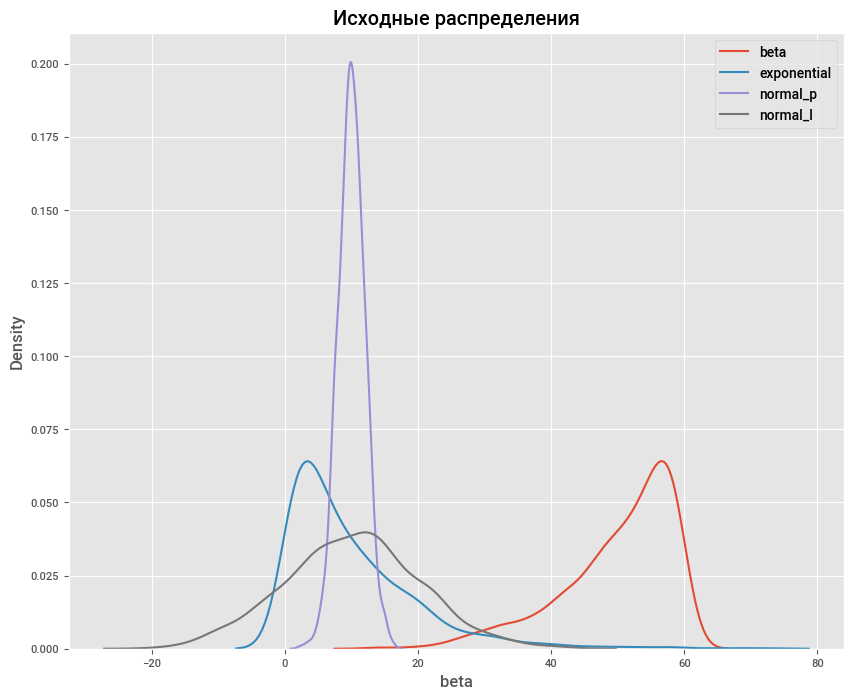

In [348]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [349]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

<AxesSubplot: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

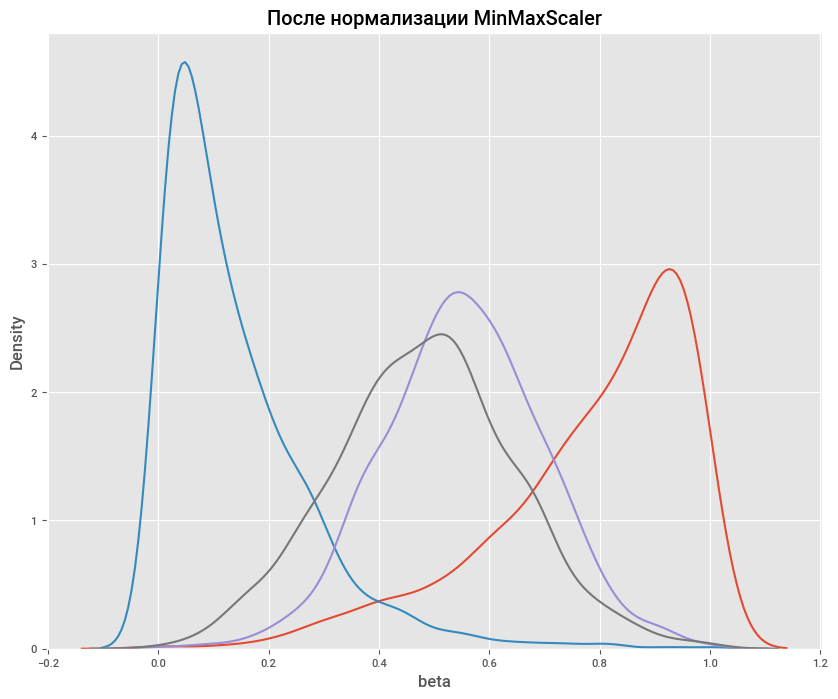

In [350]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

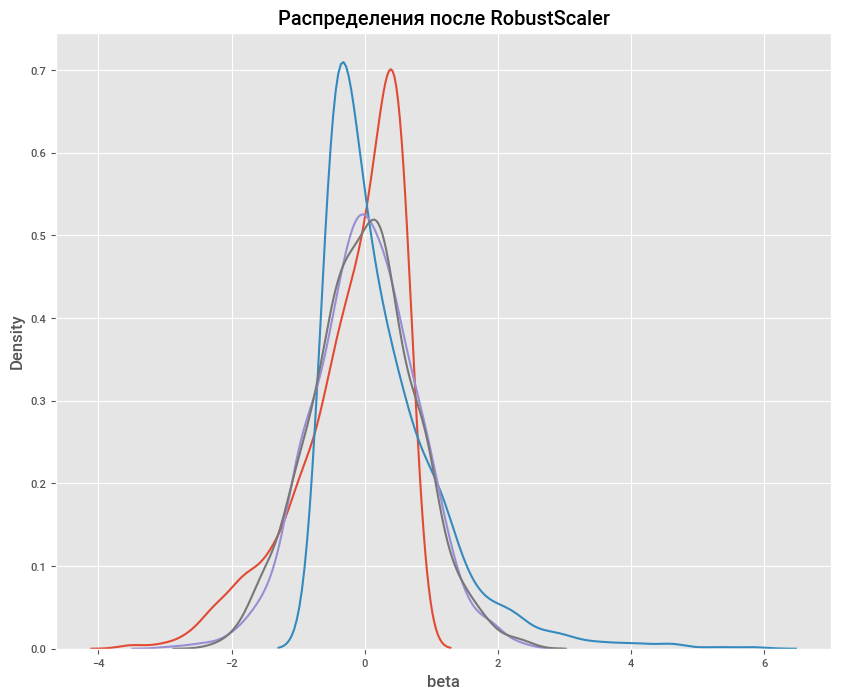

In [351]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<AxesSubplot: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

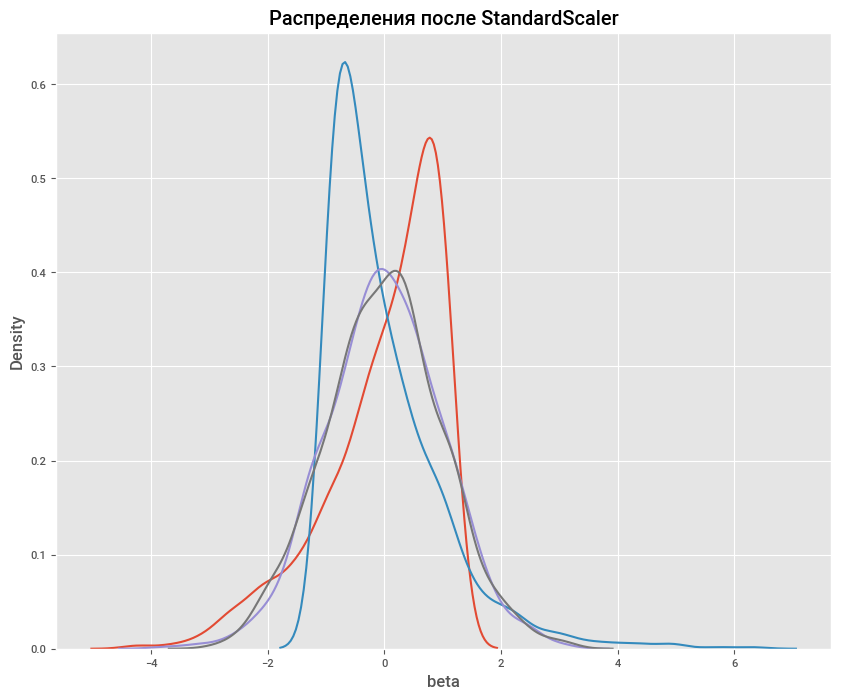

In [352]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [359]:
wc2 = pd.read_csv('data/wine_cleared.csv')

In [361]:
from sklearn.preprocessing import RobustScaler
# проводим трансформацию и нормализацию одного признака
wc2['price'] = RobustScaler().fit_transform(pd.DataFrame(wc2['price']))
print(round(wc2['price'].sum()))

43501


In [362]:
from sklearn.preprocessing import StandardScaler
wc = pd.read_csv('data/wine_cleared.csv')
wc['price'] = StandardScaler().fit_transform(pd.DataFrame(wc['price']))
print(round(wc['price'][129968], 2))

-0.14


In [363]:
iris = pd.read_csv('data/iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\1094387807.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

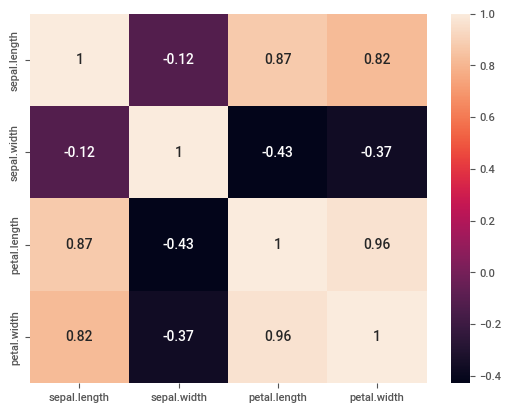

In [364]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [365]:
iris = iris.drop(['petal.width'], axis=1)

In [366]:
iris = iris.drop(['petal.length'], axis=1)

In [367]:
iris.head()

sepal.length  sepal.width variety
0           5.1          3.5  Setosa
1           4.9          3.0  Setosa
2           4.7          3.2  Setosa
3           4.6          3.1  Setosa
4           5.0          3.6  Setosa

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\2523876750.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

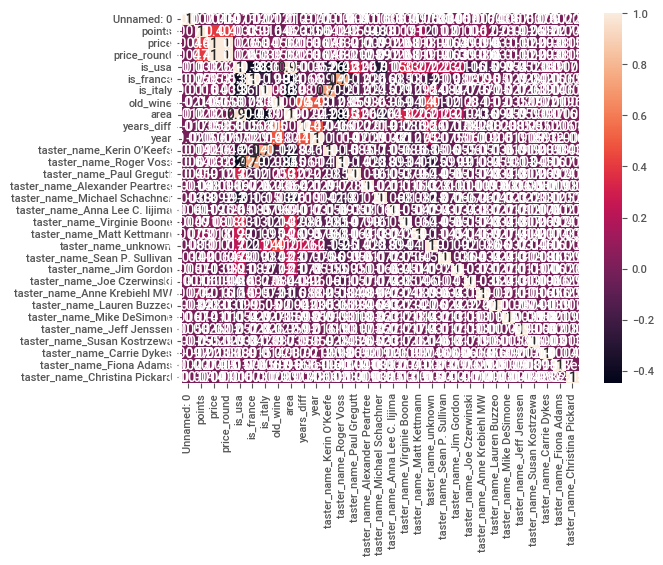

In [386]:
sns.heatmap(wc.corr(), annot = True)

In [387]:
wc.corr()

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_21016\684897852.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Unnamed: 0    points     price  price_round  \
Unnamed: 0                        1.000000  0.007125  0.004648     0.004662   
points                            0.007125  1.000000  0.402136     0.402064   
price                             0.004648  0.402136  1.000000     0.999997   
price_round                       0.004662  0.402064  0.999997     1.000000   
is_usa                            0.010928  0.032592  0.025873     0.026379   
is_france                        -0.002187  0.059248  0.053139     0.052615   
is_italy                         -0.010178  0.015926  0.039566     0.039314   
old_wine                         -0.020735 -0.046295  0.055555     0.055453   
area                              0.011775  0.023427  0.021446     0.021984   
years_diff                       -0.016941 -0.034794  0.052737     0.052654   
year                             -0.019917 -0.049948  0.006700     0.006689   
taster_name_Kerin O’Keefe        -0.001919  0.041624  0.045876     0.045836   
taster_name_Roger Voss           -0.006653  0.042413  0.032450     0.031814   
taster_name_Paul Gregutt         -0.004070  0.058808 -0.012171    -0.012002   
taster_name_Alexander Peartree   -0.001603 -0.048256 -0.008980    -0.008947   
taster_name_Michael Schachner    -0.003838 -0.183876 -0.091814    -0.091623   
taster_name_Anna Lee C. Iijima    0.006095 -0.001944 -0.026131    -0.026030   
taster_name_Virginie Boone        0.004862  0.070935  0.079801     0.079972   
taster_name_Matt Kettmann         0.007525  0.116255  0.018468     0.018580   
taster_name_unknown              -0.008287 -0.107895  0.017044     0.017056   
taster_name_Sean P. Sullivan      0.013706  0.020235 -0.006380    -0.006268   
taster_name_Jim Gordon            0.005671  0.010739 -0.038748    -0.038634   
taster_name_Joe Czerwinski        0.000164  0.005952 -0.000938    -0.000858   
taster_name_Anne Krebiehl MW      0.007386  0.118878 -0.016450    -0.016463   
taster_name_Lauren Buzzeo        -0.003379 -0.027858 -0.030684    -0.030681   
taster_name_Mike DeSimone         0.006719  0.013567 -0.011281    -0.011252   
taster_name_Jeff Jenssen          0.005337 -0.002581 -0.020428    -0.020389   
taster_name_Susan Kostrzewa      -0.007546 -0.055476 -0.028554    -0.028505   
taster_name_Carrie Dykes          0.009742 -0.022082 -0.003784    -0.003765   
taster_name_Fiona Adams           0.002223 -0.007389 -0.001535    -0.001526   
taster_name_Christina Pickard    -0.001707 -0.001372 -0.001035    -0.001031   

                                  is_usa  is_france  is_italy  old_wine  \
Unnamed: 0                      0.010928  -0.002187 -0.010178 -0.020735   
points                          0.032592   0.059248  0.015926 -0.046295   
price                           0.025873   0.053139  0.039566  0.055555   
price_round                     0.026379   0.052615  0.039314  0.055453   
is_usa                          1.000000  -0.384584 -0.357477 -0.007533   
is_france                      -0.384584   1.000000 -0.190359 -0.082903   
is_italy                       -0.357477  -0.190359  1.000000  0.085629   
old_wine                       -0.007533  -0.082903  0.085629  1.000000   
area                            0.966549  -0.398449 -0.393994  0.007443   
years_diff                     -0.004996  -0.066337  0.081176  0.502450   
year                           -0.052228   0.029475  0.017816  0.477864   
taster_name_Kerin O’Keefe      -0.255523  -0.136068  0.714798 -0.122802   
taster_name_Roger Voss         -0.419923   0.735644 -0.202633 -0.085127   
taster_name_Paul Gregutt        0.317338  -0.124639 -0.118007  0.058816   
taster_name_Alexander Peartree  0.066598  -0.025613 -0.023807 -0.035517   
taster_name_Michael Schachner  -0.305057  -0.163006 -0.147603  0.030124   
taster_name_Anna Lee C. Iijima  0.050229  -0.084860 -0.078879 -0.068968   
taster_name_Virginie Boone      0.331129  -0.127347 -0.118371 -0.140668   
taster_name_Matt Kettmann       0.266220  -0.102412 -0.095193 -0.143087   
tas

In [23]:
import pandas as pd
import numpy as np

In [24]:
heart = pd.read_csv('data/heart.csv')

In [25]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [26]:
heart['old'].sum()

79

In [27]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  old       303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [28]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  
0   0     1       1    1  
1   0     2       1    0  
2   0     2       1    0  
3   0     2       1    0  
4   0     2       1    0

In [29]:
def trestbps_mean(x):
    if x['age'] < 21:
      if x['sex'] == 1:
        return 123
      else:
        return 116
    
    elif x['age'] < 31:
      if x['sex'] == 1:
        return 126
      else:
        return 120

    elif x['age'] < 41:
      if x['sex'] == 1:
        return 129
      else:
        return 127

    elif x['age'] < 51:
      if x['sex'] == 1:
        return 135
      else:
        return 137

    elif x['age'] < 61:
      if x['sex'] == 1:
        return 142
      else:
        return 144

    elif x['age'] > 60:
      if x['sex'] == 1:
        return 142
      else:
        return 159

heart['trestbps_mean'] = heart[['age','sex']].apply(trestbps_mean, axis=1)

In [30]:
heart['trestbps_mean'][300]

142

In [31]:
import category_encoders as ce # импорт для работы с кодировщиком
ord_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
heart_bin = ord_encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, heart_bin], axis=1)

heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0     63    1   3       145   233    1        0      150      0      2.3  ...   
1     37    1   2       130   250    0        1      187      0      3.5  ...   
2     41    0   1       130   204    0        0      172      0      1.4  ...   
3     56    1   1       120   236    0        1      178      0      0.8  ...   
4     57    0   0       120   354    0        1      163      1      0.6  ...   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...   
298   57    0   0       140   241    0        1      123      1      0.2  ...   
299   45    1   3       110   264    0        1      132      0      1.2  ...   
300   68    1   0       144   193    1        1      141      0      3.4  ...   
301   57    1   0       130   131    0        1      115      1      1.2  ...   
302   57    0   1       130   236    0        0      174      0      0.0  ...   

     slope_3  ca_1  ca_2  ca_3  ca_4  ca_5  thal_1  thal_2  thal_3  thal_4  
0          0     1     0     0     0     0       1       0       0       0  
1          0     1     0     0     0     0       0       1       0       0  
2          0     1     0     0     0     0       0       1       0       0  
3          0     1     0     0     0     0       0       1       0       0  
4          0     1     0     0     0     0       0       1       0       0  
..       ...   ...   ...   ...   ...   ...     ...     ...     ...     ...  
298        1     1     0     0     0     0       0       0       1       0  
299        1     1     0     0     0     0       0       0       1       0  
300        1     0     1     0     0     0       0       0       1       0  
301        1     0     0     1     0     0       0       0       1       0  
302        1     0     0     1     0     0       0       1       0       0  

[303 rows x 35 columns]

In [32]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>,
        <AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>],
       [<AxesSubplot: title={'center': '12'}>,
        <AxesSubplot: title={'center': '13'}>,
        <AxesSubplot: title={'center': '14'}>,
        <AxesSubplot: title={'center': '15'}>,
        <AxesSubplot: title={'center': '16'}>,
        <AxesSubplot: title={'center': '17'}>],
       [<AxesSubplot: title={'center': '18'}>,
        <AxesSubplot: title={'center': '19'}>,
        <AxesSubplot: title={'center': '20'}>,
        <AxesSubplot

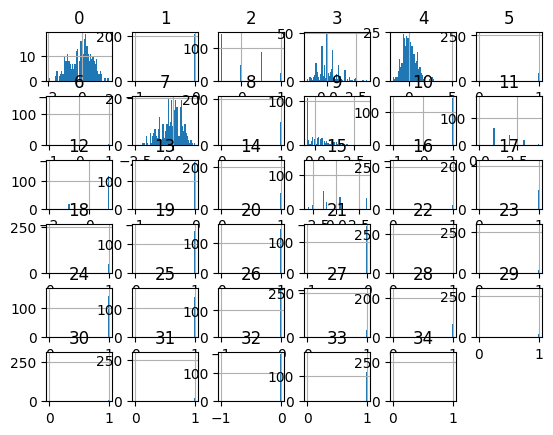

In [37]:
from sklearn import preprocessing
# проводим трансформацию и нормализацию одного признака
r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r)
heart_r.hist(bins=50)

In [38]:
print(heart_r)

           0    1    2     3         4    5    6         7    8       9   ...  \
0    0.592593  0.0  1.0  0.75 -0.110236  1.0 -1.0 -0.092308  0.0  0.9375  ...   
1   -1.333333  0.0  0.5  0.00  0.157480  0.0  0.0  1.046154  0.0  1.6875  ...   
2   -1.037037 -1.0  0.0  0.00 -0.566929  0.0 -1.0  0.584615  0.0  0.3750  ...   
3    0.074074  0.0  0.0 -0.50 -0.062992  0.0  0.0  0.769231  0.0  0.0000  ...   
4    0.148148 -1.0 -0.5 -0.50  1.795276  0.0  0.0  0.307692  1.0 -0.1250  ...   
..        ...  ...  ...   ...       ...  ...  ...       ...  ...     ...  ...   
298  0.148148 -1.0 -0.5  0.50  0.015748  0.0  0.0 -0.923077  1.0 -0.3750  ...   
299 -0.740741  0.0  1.0 -1.00  0.377953  0.0  0.0 -0.646154  0.0  0.2500  ...   
300  0.962963  0.0 -0.5  0.70 -0.740157  1.0  0.0 -0.369231  0.0  1.6250  ...   
301  0.148148  0.0 -0.5  0.00 -1.716535  0.0  0.0 -1.169231  1.0  0.2500  ...   
302  0.148148 -1.0  0.0  0.00 -0.062992  0.0 -1.0  0.646154  0.0 -0.5000  ...   

      25   26   27   28   2

In [42]:
heart_r.dtypes[(heart_r.dtypes == 'int64') | (heart_r.dtypes == 'float64')].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')

In [44]:
import statistics
statistics.stdev(heart_r[4])

0.8162322990225203

In [39]:
heart_r.corr()

0         1         2         3         4         5         6   \
0   1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308 -0.116211   
1  -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032 -0.058196   
2  -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444  0.044421   
3   0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531 -0.114103   
4   0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294 -0.151040   
5   0.121308  0.045032  0.094444  0.177531  0.013294  1.000000 -0.084189   
6  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189  1.000000   
7  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567  0.044123   
8   0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665 -0.070733   
9   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747 -0.058770   
10 -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894  0.093045   
11  0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979 -0.072042   
12  0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019 -0.011981   
13 -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046  0.137230   
14  0.718028 -0.144941 -0.024753  0.180631  0.159388  0.026790 -0.067531   
15  0.763055 -0.472583 -0.047148  0.236108  0.284474  0.071056 -0.039955   
16  0.047516  0.088043  0.565508  0.151343 -0.050589  0.055511 -0.074654   
17 -0.059432 -0.116588  0.636283 -0.045107 -0.037918  0.083679  0.084196   
18 -0.147399 -0.041249  0.014240 -0.081851 -0.012750 -0.060649  0.077859   
19  0.138253  0.089621 -0.887256  0.021447  0.070684 -0.060190 -0.094591   
20  0.141398  0.036539 -0.058633  0.133249  0.166565  0.077405 -0.976386   
21 -0.160654 -0.011940  0.070575 -0.146576 -0.174394 -0.066344  0.901934   
22  0.084621 -0.107689 -0.052423  0.058635  0.034615 -0.048305  0.324291   
23  0.030536  0.046183  0.008741  0.122384 -0.045340  0.105284 -0.026958   
24 -0.192580 -0.014356  0.152040 -0.087472 -0.028054 -0.020255  0.100989   
25  0.177201 -0.009157 -0.156633  0.025207  0.051177 -0.033360 -0.087349   
26 -0.350844 -0.122854  0.193087 -0.055011 -0.080600 -0.112548  0.096607   
27  0.226491 -0.020571 -0.171632  0.088386  0.059887  0.122080 -0.058198   
28  0.179284  0.096673 -0.045686 -0.059485  0.018775 -0.014774 -0.050897   
29  0.162243  0.066758 -0.107590  0.080109  0.098568  0.075867 -0.064842   
30 -0.122378  0.088212  0.054436  0.019059 -0.095785  0.018754  0.067098   
31  0.063758  0.141135 -0.073254  0.076369 -0.093560  0.091351 -0.013429   
32 -0.135891 -0.376365  0.266947 -0.140712 -0.004591 -0.086774  0.029597   
33  0.110752  0.321559 -0.237760  0.109573  0.059621  0.030953 -0.023012   
34 -0.016779 -0.032093  0.002611 -0.016870 -0.057127  0.080568 -0.004356   

          7         8         9   ...        25        26        27        28  \
0  -0.398522  0.096801  0.210013  ...  0.177201 -0.350844  0.226491  0.179284   
1  -0.044020  0.141664  0.096093  ... -0.009157 -0.122854 -0.020571  0.096673   
2   0.295762 -0.394280 -0.149230  ... -0.156633  0.193087 -0.171632 -0.045686   
3  -0.046698  0.067616  0.193216  ...  0.025207 -0.055011  0.088386 -0.059485   
4  -0.009940  0.067023  0.053952  ...  0.051177 -0.080600  0.059887  0.018775   
5  -0.008567  0.025665  0.005747  ... -0.033360 -0.112548  0.122080 -0.014774   
6   0.044123 -0.070733 -0.058770  ... -0.087349  0.096607 -0.058198 -0.050897   
7   1.000000 -0.378812 -0.344187  ... -0.419627  0.273136 -0.056905 -0.195502   
8  -0.378812  1.000000  0.288223  ...  0.257687 -0.187734  0.097399  0.150206   
9  -0.344187  0.288223  1.000000  ...  0.310986 -0.204803  0.218319 -0.011613   
10  0.386784 -0.257748 -0.577537  ... -0.601576  0.066418 -0.035229  0.000561   
11 -0.213177  0.115739  0.222682  ...  0.141923 -0.835359  0.471299  0.138532   
12 -0.096439  0.206754  0.210244  ...  0.120269 -0.173448  0.066609  0.100232   
13  0.421741 -0.436757 -0.430696  ... -0.362053  0.465590 -0.273998 -0.232412   
14 -0.271898  0.019043  0.159997  ...  0.128139 -0.222607 

<AxesSubplot: >

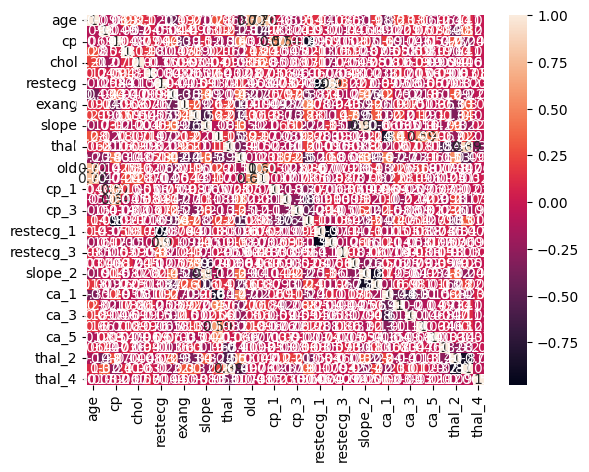

In [52]:
import seaborn as sns

sns.heatmap(heart.corr(), annot = True, )

In [51]:
heart.corr()

age       sex        cp  trestbps      chol       fbs  \
age            1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex           -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp            -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps       0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol           0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs            0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg       -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach       -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang          0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak        0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope         -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca             0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal           0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target        -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   
old            0.718028 -0.144941 -0.024753  0.180631  0.159388  0.026790   
trestbps_mean  0.763055 -0.472583 -0.047148  0.236108  0.284474  0.071056   
cp_1           0.047516  0.088043  0.565508  0.151343 -0.050589  0.055511   
cp_2          -0.059432 -0.116588  0.636283 -0.045107 -0.037918  0.083679   
cp_3          -0.147399 -0.041249  0.014240 -0.081851 -0.012750 -0.060649   
cp_4           0.138253  0.089621 -0.887256  0.021447  0.070684 -0.060190   
restecg_1      0.141398  0.036539 -0.058633  0.133249  0.166565  0.077405   
restecg_2     -0.160654 -0.011940  0.070575 -0.146576 -0.174394 -0.066344   
restecg_3      0.084621 -0.107689 -0.052423  0.058635  0.034615 -0.048305   
slope_1        0.030536  0.046183  0.008741  0.122384 -0.045340  0.105284   
slope_2       -0.192580 -0.014356  0.152040 -0.087472 -0.028054 -0.020255   
slope_3        0.177201 -0.009157 -0.156633  0.025207  0.051177 -0.033360   
ca_1          -0.350844 -0.122854  0.193087 -0.055011 -0.080600 -0.112548   
ca_2           0.226491 -0.020571 -0.171632  0.088386  0.059887  0.122080   
ca_3           0.179284  0.096673 -0.045686 -0.059485  0.018775 -0.014774   
ca_4           0.162243  0.066758 -0.107590  0.080109  0.098568  0.075867   
ca_5          -0.122378  0.088212  0.054436  0.019059 -0.095785  0.018754   
thal_1         0.063758  0.141135 -0.073254  0.076369 -0.093560  0.091351   
thal_2        -0.135891 -0.376365  0.266947 -0.140712 -0.004591 -0.086774   
thal_3         0.110752  0.321559 -0.237760  0.109573  0.059621  0.030953   
thal_4        -0.016779 -0.032093  0.002611 -0.016870 -0.057127  0.080568   

                restecg   thalach     exang   oldpeak  ...   slope_3  \
age           -0.116211 -0.398522  0.096801  0.210013  ...  0.177201   
sex           -0.058196 -0.044020  0.141664  0.096093  ... -0.009157   
cp             0.044421  0.295762 -0.394280 -0.149230  ... -0.156633   
trestbps      -0.114103 -0.046698  0.067616  0.193216  ...  0.025207   
chol          -0.151040 -0.009940  0.067023  0.053952  ...  0.051177   
fbs           -0.084189 -0.008567  0.025665  0.005747  ... -0.033360   
restecg        1.000000  0.044123 -0.070733 -0.058770  ... -0.087349   
thalach        0.044123  1.000000 -0.378812 -0.344187  ... -0.419627   
exang         -0.070733 -0.378812  1.000000  0.288223  ...  0.257687   
oldpeak       -0.058770 -0.344187  0.288223  1.000000  ...  0.310986   
slope          0.093045  0.386784 -0.257748 -0.577537  ... -0.601576   
ca            -0.072042 -0.213177  0.115739  0.222682  ...  0.141923   
thal          -0.011981 -0.096439  0.206754  0.210244  ...  0.120269   
target         0.137230  0.421741 -0.436757 -0.430696  ... -0.362053   
old           -0.067531 -0.271898  0.019043  0.159997  ...  0.128139   
trestbps_mean -0.039955 -0.247197  0.004429  0.125405  ...  0.086657   
cp_1          -0.074654

In [53]:
import statistics
x = [7.84, 7.62, 7.57, 7.55, 7.46, 7.39, 7.36, 7.32, 7.28, 7.27]
statistics.mean(x)



7.466